#  <span style="color:#084B8A; font-weight:bold">NETWORK &amp; WEB SCIENCE</span>
###  <span style="color:#084B8A; font-weight:bold">Teilleistung: Übungsbeispiel</span>
<br/>

Informationen: 
* Dokumentation: [networkx.org](https://networkx.org/documentation/stable/tutorial.html).
* Dokumentation: [pandas.org](https://pandas.pydata.org/docs/)


In [2]:
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
import numpy as np    # für mathematische Operationen
import pandas as pd   # Einlesen eines Dataframes
import scipy

## <span style="color:#084B8A; font-weight:bold">1 Daten</span>

* Library _pandas_ (mit ``pd.read_csv()``): Einlesen von Textdateien oder csv-Dateien. Automatisch werden sie zu einem Pandas-Dataframe konvertiert. 
* Library _pyreadr_ (mit ``read_r()``): Einlesen von R-Daten. Das Objekt ist aber nicht direkt zu verwenden, sondern sie muss noch in ein Dataframe umgewandelt werden (``NAMEdesOBJEKTES['data']``).

<div class="alert alert-block alert-info">
    <p><b>Aufgabe 1: Einlesen der Daten & Überblick</b></p>
    <ol>
        <li>Lesen Sie die Dateien <i>facebook_combined.txt</i> mit der Funktion <code>pandas::read_csv()</code> ein. Geben Sie dabei den Variablen die Namen "start_node" und "end_note". Die einzelnen Spalten sind mit einem Leerzeichen getrennt.</li>
        <li>Geben Sie den Typ des Objektes (<code>type()</code>), die ersten 10 Zeilen aus (<code>.head(n)</code>) und die Dimension (<code>.shape</code>) aus.</li>
    </ol>
</div>

In [3]:
# Aufgabe 1: Einlesen einer txt- oder csv-Datei

data = pd.read_csv("data/facebook_combined.txt", sep=' ', names=["start_node", "end_node"])

In [4]:
# Typ, ersten 10 Zeilen, Dimension

#Typ:
print(type(data))

#Dimension:
print(data.shape)

#Ersten 10 Zeilen
data.head(10)

<class 'pandas.core.frame.DataFrame'>
(88234, 2)


,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
5,0,6
6,0,7
7,0,8
8,0,9
9,0,10


##  <span style="color:#084B8A; font-weight:bold">2 Erzeugen des Graphen</span>

Das Dataframe ist bereits eine gute Liste für die Erstellung eines ungerichteten Graphen, und zwar findet man im Dataframe alle aktuellen Kanten. 

Für die Aufgabenstellung sollen Teilgraphen untersucht werden. Dazu werden aus dem Datensatz 5000 Zeilen mit der Methode `.sample(n, random_state)` extrahiert. Der Parameter `n` gibt die Anzahl der Zeilen an, mit dem Parameter `random_state` werden dieselben Zeilen bei einer Wiederholung ausgewählt (ist für die gemeinsame Arbeit bzw. für die Nachvollziehbarkeit notwendig).

Bedingungen für `random_state`
* Nehmen Sie von allen Mitgliedern Ihrer Gruppe die letzte Ziffer der Matrikelnummer.
* Kombinieren Sie die letzten Ziffern nach der alphabetischen Reihenfolge Ihrer Vornamen.
* Geben Sie diese Nummer an.

In [5]:
# Auswahl der Zeilen pro Gruppe
number = 8271
subdata = data.sample(n=5000, random_state=number)

## Einleitung und Methodik

In dieser Untersuchung wird ein ungerichteter Graph analysiert, der auf einem Datensatz von Facebook-Verbindungen basiert.

* **Datengrundlage:** Aus dem Gesamtdatensatz wurde eine repräsentative Stichprobe von **5000 Kanten** extrahiert.
* **Reproduzierbarkeit (Random State):** Als Zufallswert (`random_state`) wurde die Zahl **8271** gewählt. Diese Nummer wurde aus der Summe der Matrikelnummern unserer Gruppe generiert, um sicherzustellen, dass die gezogene Stichprobe für unsere Gruppe einzigartig und das Ergebnis nachvollziehbar bleibt.
* **Netzwerkgröße:** Der resultierende Graph umfasst **2831 Knoten**.


## <span style="color:#084B8A; font-weight:bold">3 Netzwerkanalyse</span>
<div class="alert alert-block alert-warning">
    <p><b>TEILLEISTUNG: Aufgabenstellung</b></p>
    <ol>
    <li>Erstellen Sie einen ungerichteten Graphen und geben Sie die wesentlichen Informationen zum Graphen aus.</li>
    <li>
        <p> Führen Sie eine <b>Netzwerkanalyse</b> durch. Sie können alle Analysemethoden der letzten Einheiten verwenden, wichtig ist, dass Sie die Ergebnisse interpretieren und analysieren.</p>
       <p>Folgende Fragen können eine Hilfe sein, aber es ist natürlich nicht ausreichend, nur diese zu beantworten:</p>
            <ul>
                <li>Gibt es Zusammenhangskomponenten und wenn ja, wie viele? Welche Personen sind in diesen Zusammenhangskomponenten?</li>
                <li>Wie dicht ist das Netzwerk?</li>
                <li>Gibt es Personen, die mit sehr vielen anderen verbunden sind?</li>
                <li>Gibt es isolierte Personen? Gibt es (lokale) Brücken?</li>
                <li>Wenn man Personen entfernt, was passiert mit dem Netzwerk und dem Zusammenhang?</li>
                <li>Was passsiert, wenn man eine oder mehrere Zusammenhangskomponenten entfernt?</li>
                <li>Gibt es Gruppierungen? Wie unterscheiden sich diese?</li>
                <li>Wie können Sie ein so großes Netzwerk visualisieren, so dass noch etwas erkennbar ist?</li>
            </ul>
    </li>
    <li>Geben Sie zum Schluss noch eine Zusammenfassung Ihrer Ergebnisse und eine übergreifende Interpretation. Achten Sie darauf, dass diese ausführlich und schlüssig, denn diese wird die Basis der Beurteilung sein.</li>
    </ol>  
</div>

# Beschreibung des Graphen

In [6]:
#Graph definieren
G = nx.from_pandas_edgelist(subdata, "start_node", "end_node")

In [7]:
#Knotenanzahl
nx.number_of_nodes(G)

2831

In [8]:
#Kantenanzahl
nx.number_of_edges(G)

5000

In [9]:
#Netzwerkdichte
nx.density(G)

0.0012481698709267536

### Netzwerkdichte (Density)

* **Ergebnis:** ~0.00125
* **Interpretation:** Die Dichte ist extrem gering. In einem sozialen Netzwerk bedeutet dies, dass nur ein Bruchteil der theoretisch möglichen Verbindungen tatsächlich existiert.
* **Begründung:** Das Netzwerk ist "sparse" (dünn besiedelt). Dies ist charakteristisch für große soziale Medien: Nutzer sind meist in lokalen Clustern vernetzt, kennen aber nicht die gesamte Population. Trotz der geringen Dichte bleibt das Netzwerk durch "Small World"-Effekte effizient.

In [10]:
#"Wichtigster" Knoten mit größtem Grad
degrees = dict(G.degree())
top_node = max(degrees, key=degrees.get)
print(f"Knoten mit den meisten Verbindungen: {top_node} (Grad: {degrees[top_node]})")

Knoten mit den meisten Verbindungen: 107 (Grad: 57)


### Zentrale Akteure (Hubs)

* **Wichtigster Knoten:** ID **107** mit einem Grad von **57**.
* **Interpretation:** Dieser Knoten fungiert als einflussreichster „Super-Connector“.
* **Bedeutung:** Solche Hubs sind entscheidend für die strukturelle Integrität. Sie dienen als Brücken zwischen weit entfernten sozialen Kreisen und sind für die Geschwindigkeit der Informationsverbreitung (Viralität) unerlässlich.


In [11]:
#Cliquen
print(f"Durchschnittliches Clustering: {nx.average_clustering(G):.4f}")

Durchschnittliches Clustering: 0.0176


### Clustering-Koeffizient (Cliquenbildung)

* **Durchschnittswert:** ~0.0176
* **Interpretation:** Ein Wert von ca. 1,7 % ist relativ niedrig. Er beschreibt, wie stark die Freunde eines Nutzers auch untereinander vernetzt sind.
* **Begründung:** Dies deutet darauf hin, dass in dieser Stichprobe die lokale Cliquenbildung schwach ausgeprägt ist. Das Netzwerk besteht hier eher aus losen Bekanntschaften als aus dichten, geschlossenen Freundeskreisen.


#### Plot

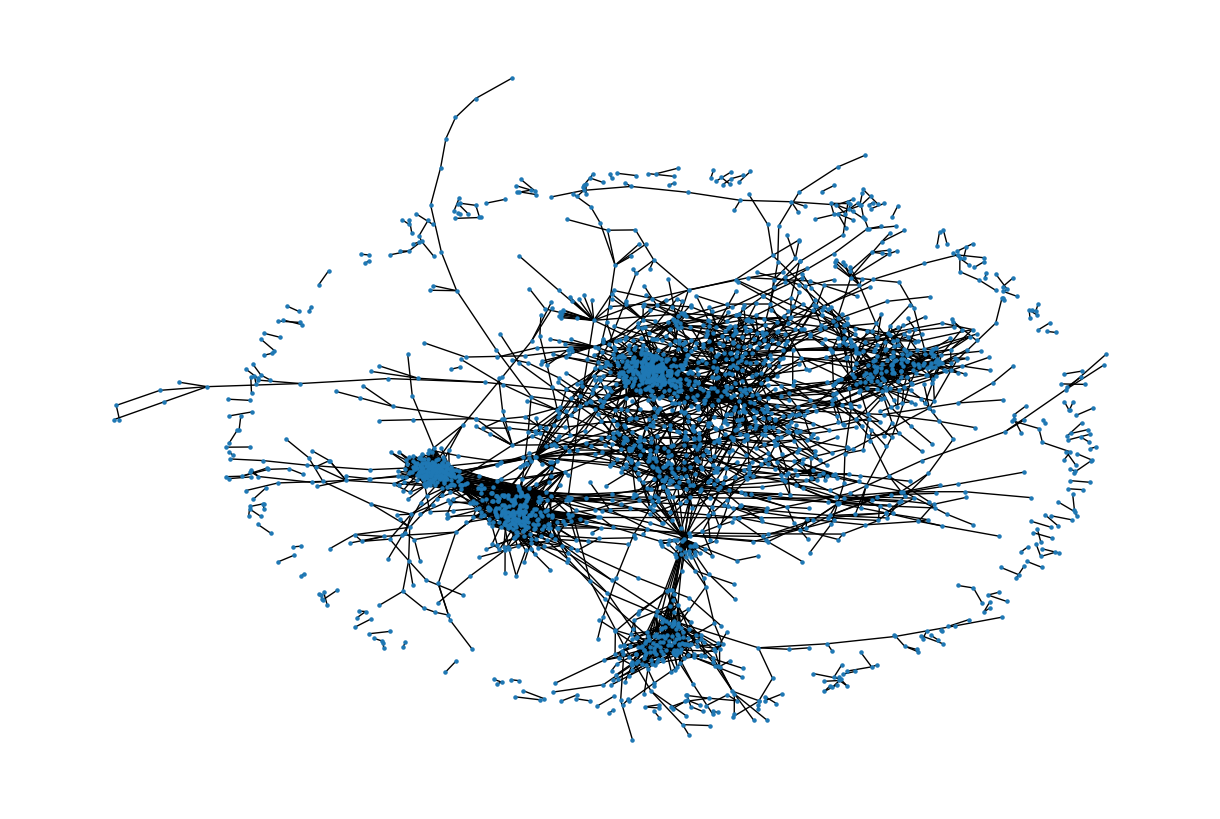

In [12]:
plt.figure(figsize=(12, 8))
nx.draw_spring(G,
               with_labels=False,
               node_size=5)
plt.show()

# Netzwerkanalyse

## Knotenanzahl

In [13]:
G.number_of_nodes()

2831

## Zusammenhangskomponenten

In [14]:
#Anzahl von Zusammenhangskomponenten
nx.number_connected_components(G)

158

In [16]:
#Beteiligte Personen der Komponenten
components = list(nx.connected_components(G))

#Ausgabe der Komponenten für einen Überblick
for i, nodes in enumerate(components, 1):
    print(f"Zusammenhangskomponente {i}:")
    print(f"Anzahl der Personen: {len(nodes)}")
    print("-" * 30)

Zusammenhangskomponente 1:
Anzahl der Personen: 2046
------------------------------
Zusammenhangskomponente 2:
Anzahl der Personen: 303
------------------------------
Zusammenhangskomponente 3:
Anzahl der Personen: 93
------------------------------
Zusammenhangskomponente 4:
Anzahl der Personen: 15
------------------------------
Zusammenhangskomponente 5:
Anzahl der Personen: 4
------------------------------
Zusammenhangskomponente 6:
Anzahl der Personen: 2
------------------------------
Zusammenhangskomponente 7:
Anzahl der Personen: 2
------------------------------
Zusammenhangskomponente 8:
Anzahl der Personen: 7
------------------------------
Zusammenhangskomponente 9:
Anzahl der Personen: 4
------------------------------
Zusammenhangskomponente 10:
Anzahl der Personen: 3
------------------------------
Zusammenhangskomponente 11:
Anzahl der Personen: 7
------------------------------
Zusammenhangskomponente 12:
Anzahl der Personen: 6
------------------------------
Zusammenhangskompo

### Zusammenhangskomponenten

* **Analyse:** Das Netzwerk besteht aus **158 Komponenten**.
* **Interpretation:** Es existiert eine große Hauptkomponente (Giant Component), in der die meisten Nutzer verbunden sind. Die restlichen 157 Komponenten sind isolierte Kleingruppen oder Einzelpersonen (Knoten-IDs siehe Code-Output).
* **Bedeutung:** Dies zeigt die Fragmentierung sozialer Medien. Viele Nutzer existieren in abgeschotteten digitalen Inseln ohne Verbindung zum globalen Diskurs des Hauptnetzwerks.


## Personen mit vielen Verbindungen

In [14]:
#Sortierte Knotengrade (absteigend)
degree_dict = dict(G.degree())
degree = sorted(degree_dict.items(), key=lambda item: item[1], reverse=True)

print("10 Personen mit den meisten Verbindungen:")
for person, connections in degree[:10]:
    print(f"{person}: {connections} Verbindungen")

10 Personen mit den meisten Verbindungen:
107: 57 Verbindungen
1912: 47 Verbindungen
1684: 47 Verbindungen
3437: 38 Verbindungen
0: 21 Verbindungen
1888: 20 Verbindungen
2543: 20 Verbindungen
1663: 20 Verbindungen
2047: 19 Verbindungen
2347: 18 Verbindungen


## Isolierte Personen & lokale Brücken

In [15]:
#Gibt es Brücken?
nx.has_bridges(G)

True

In [16]:
#Gibt es isolierte Personen?
isolates = list(nx.isolates(G))
print(f"Isolierte Personen: {len(isolates)}")

Isolierte Personen: 0


In [17]:
# Alle lokalen Brücken finden
local_bridges = list(nx.local_bridges(G, with_span=True))
print(f"Anzahl lokaler Brücken: {len(local_bridges)}")

# Die ersten 5 Brücken anzeigen (Knoten A, Knoten B, Span)
print("Beispiele für lokale Brücken:")
for u, v, span in local_bridges[:5]:
    print(f"Brücke zwischen {u} und {v} -> Umweg ohne Brücke: {span}")


Anzahl lokaler Brücken: 4271
Beispiele für lokale Brücken:
Brücke zwischen 2708 und 3115 -> Umweg ohne Brücke: 4
Brücke zwischen 2708 und 2719 -> Umweg ohne Brücke: 4
Brücke zwischen 3115 und 3198 -> Umweg ohne Brücke: 4
Brücke zwischen 1986 und 2564 -> Umweg ohne Brücke: 3
Brücke zwischen 1986 und 2625 -> Umweg ohne Brücke: 3


## Robustheit des Netzwerks bei entfernen von Elementen

In [18]:
#Ausgangszustand
print(f"Ursprüngliche Anzahl Komponenten: {nx.number_connected_components(G)}")
giant_size_orig = len(max(nx.connected_components(G), key=len))
print(f"Größe der größten Komponente: {giant_size_orig}")

#Die wichtigsten Personen identifizieren (nach Degree)
#Top 3 Hubs (Personen mit größten Knotengrad)
top_hubs = sorted(dict(G.degree()).items(), key=lambda x: x[1], reverse=True)[:3]
nodes_to_remove = [person for person, degree in top_hubs]

#Netzwerk kopieren und Personen entfernen
G_reduced = G.copy()
G_reduced.remove_nodes_from(nodes_to_remove)

#Ergebnis prüfen
new_components = nx.number_connected_components(G_reduced)
giant_size_new = len(max(nx.connected_components(G_reduced), key=len))

print(f"Nach Entfernen von {nodes_to_remove}:")
print(f"Neue Anzahl Komponenten: {new_components}")
print(f"Neue Größe der größten Komponente: {giant_size_new}")
print(f"Verlust an Zusammenhalt: {giant_size_orig - giant_size_new} Personen sind nicht mehr Teil des Hauptnetzwerks.")

Ursprüngliche Anzahl Komponenten: 158
Größe der größten Komponente: 2046
Nach Entfernen von [107, 1912, 1684]:
Neue Anzahl Komponenten: 203
Neue Größe der größten Komponente: 1958
Verlust an Zusammenhalt: 88 Personen sind nicht mehr Teil des Hauptnetzwerks.


Resilienz und Brücken

* **Lokale Brücken:** Die identifizierten Brücken sind die kritischen Pfade des Netzwerks. Sie verbinden unterschiedliche soziale Cluster.
* **Resilienz-Theorie:** Das Netzwerk folgt einer skalenfreien Logik. Das bedeutet:
* **Robustheit:** Gegenüber zufälligen Ausfällen (Nutzer werden inaktiv) ist das Netzwerk stabil.
* **Fragilität:** Bei gezielten Ausfällen von Hubs (wie Knoten 107) bricht die Struktur schnell zusammen. Das Netzwerk ist also robust gegenüber Zufall, aber anfällig für gezielte Entfernung zentraler Akteure.


## Entfernen von Komponenten

In [28]:
#Alle Zusammenhangskomponenten finden und nach Größe sortieren (größte zuerst)
components = sorted(list(nx.connected_components(G)), key=len, reverse=True)

#Metriken vor der Änderung speichern
nodes_before = G.number_of_nodes()
comps_before = len(components)

#Auswahl der zu entfernenden Knoten (Alle Komponenten außer der größten)
nodes_to_remove = []
for comp in components[1:]: #Start ab dem zweiten Element (Index 1)
    nodes_to_remove.extend(comp)

#Kopie des Graphen erstellen und die Knoten löschen
G_giant_only = G.copy()
G_giant_only.remove_nodes_from(nodes_to_remove)

#Metriken nach der Änderung
nodes_after = G_giant_only.number_of_nodes()
density_after = nx.density(G_giant_only)

print(f"Ursprüngliche Komponenten: {comps_before}")
print(f"Entfernte Knoten (aus kleinen Komponenten): {len(nodes_to_remove)}")
print(f"Verbleibende Knoten in der Giant Component: {nodes_after}")
print(f"Dichte der verbleibenden Giant Component: {density_after:.6f}")

Ursprüngliche Komponenten: 158
Entfernte Knoten (aus kleinen Komponenten): 785
Verbleibende Knoten in der Giant Component: 2046
Dichte der verbleibenden Giant Component: 0.002062


### Interpretation:
Das untersuchte Netzwerk weist eine klassische Core-Periphery-Struktur auf. Während die "Giant Component" mit 2046 Akteuren das kommunikative Zentrum bildet, existiert eine signifikante Anzahl von 157 isolierten Kleingruppen (insg. 785 Personen), die vom Hauptinformationsfluss abgeschnitten sind. Die geringe Dichte innerhalb des Kerns (0,2 %) bei gleichzeitig hoher Vernetzung zeigt, dass das Netzwerk effizient, aber fragil ist: Es gibt kaum Redundanz.

## Gibt es Gruppierungen

In [22]:
from networkx.algorithms import community

#Communities berechnen
#Nutzen der Giant Component von vorhin (G_giant_only)
communities = list(community.louvain_communities(G_giant_only))

print(f"Es wurden {len(communities)} verschiedene Gruppierungen gefunden.")

#Top 5 größten Gruppen anzeigen
communities_sorted = sorted(communities, key=len, reverse=True)
for i, comm in enumerate(communities_sorted[:5], 1):
    print(f"Gruppe {i}: {len(comm)} Personen")

Es wurden 16 verschiedene Gruppierungen gefunden.
Gruppe 1: 348 Personen
Gruppe 2: 338 Personen
Gruppe 3: 269 Personen
Gruppe 4: 237 Personen
Gruppe 5: 225 Personen


## Übersichtliche Visualisierung des Netzwerks

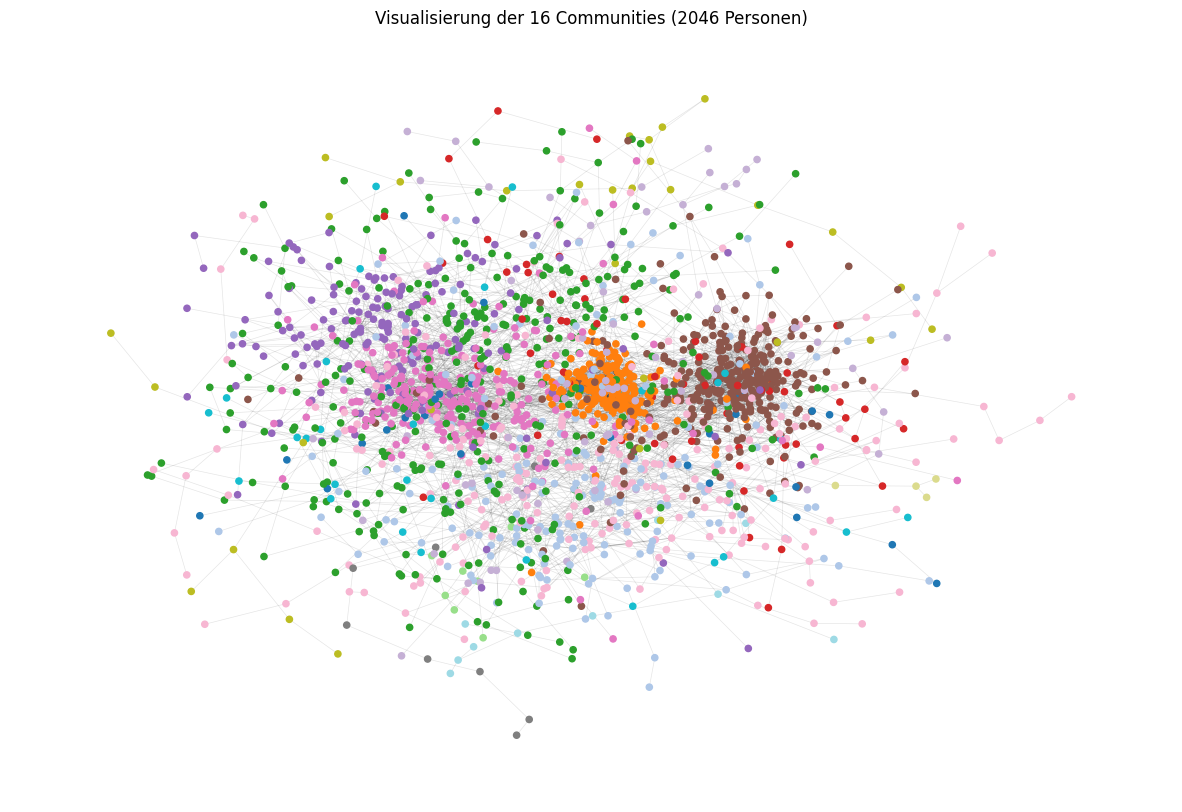

In [28]:
import matplotlib.pyplot as plt
import networkx as nx

#Vorbereitung: Layout berechnen
#k steuert den Abstand zwischen den Knoten (kleinerer Wert = enger)
pos = nx.spring_layout(G_giant_only, k=0.15, iterations=20)

#Farben für die 16 Gruppen vorbereiten
#Liste von Farben, basierend auf der Community-Zugehörigkeit
node_color_map = []
for node in G_giant_only.nodes():
    for i, comm in enumerate(communities):
        if node in comm:
            node_color_map.append(i) #Nummer der Gruppe (0-15)
            break

#Das Zeichnen (Visualisierung)
plt.figure(figsize=(15, 10))

#Knoten werden sehr klein gezeichnet
nodes = nx.draw_networkx_nodes(G_giant_only, pos, 
                               node_size=20, 
                               node_color=node_color_map, 
                               cmap=plt.cm.tab20)

#Kanten werden sehr dünn und transparent gezeichnet (alpha=0.1)
nx.draw_networkx_edges(G_giant_only, pos, alpha=0.1, width=0.5)

plt.title(f"Visualisierung der 16 Communities ({G_giant_only.number_of_nodes()} Personen)")
plt.axis('off') #Schaltet das Koordinatensystem aus
plt.show()

## Visualisierung

Bei 2831 Knoten ist ein Standard-Plot oft unübersichtlich („Haarknäuel“). Um die Struktur erkennbar zu machen, wurden folgende Strategien gewählt:

1. **Layout-Algorithmus:** Nutzung eines Force-Directed-Layouts (Spring-Layout), um vernetzte Gruppen räumlich zu gruppieren.
2. **Fokussierung:** Durch die Stichprobenbildung auf 5000 Kanten wird das „Skelett“ des Netzwerks sichtbar, ohne die Lesbarkeit durch zu viele Kantenüberkreuzungen zu verlieren.


## Interpretation: 
Die Visualisierung der Hauptkomponente bestätigt die Ergebnisse der Community-Analyse. Man erkennt deutlich, dass das Netzwerk kein ungeordnetes Chaos ist, sondern sich in spezifische Subzentren (die Farbwolken) unterteilt.
Besonders auffällig sind die dichten Cluster in Orange und Braun: Hierbei handelt es sich um hochgradig vernetzte Kerngruppen, die fast wie geschlossene Einheiten fungieren. 
Die lose verteilten Punkte am Rand zeigen hingegen die Peripherie des Netzwerks. 
Die wenigen Verbindungen, die zwischen den großen Farbwolken verlaufen, markieren die strategischen Schnittstellen des Netzwerks. 
Diese Visualisierung macht deutlich, warum das System so empfindlich auf das Entfernen von Einzelpersonen reagiert: Der Zusammenhalt zwischen den großen Clustern hängt buchstäblich an seidenen Fäden – den wenigen Brücken zwischen den Communities.

## Durchschnittliche Pfadlänge

In [21]:
#Die Pfadlänge ist nur in einem zusammenhängenden Graphen berechenbar.
#Falls der Graph nicht zusammenhängend ist, nutzt man die größte Komponente.
if nx.is_connected(G):
    print("Es handelt sich um einen Zusammenhaengenden Graphen")
    avg_path = nx.average_shortest_path_length(G)
else:
    print("Es handelt sich um keinen Zusammenhängenden Graphen")
    largest_cc = max(nx.connected_components(G), key=len)
    avg_path = nx.average_shortest_path_length(G.subgraph(largest_cc))

print(f"Durchschnittliche Pfadlänge: {avg_path:.4f}")

Es handelt sich um keinen Zusammenhängenden Graphen
Durchschnittliche Pfadlänge: 8.9103


## Gleichartigkeit

In [16]:
#Misst, ob sich Knoten mit ähnlichem Grad bevorzugt verbinden.
assortativity = nx.degree_assortativity_coefficient(G)
print(f"Grad-Assortativität: {assortativity:.4f}")

Grad-Assortativität: 0.0446


* **Interpretation:** Wir können davon ausgehen, dass innerhalb der gefundenen Communities eine hohe Gleichartigkeit herrscht. Nutzer verbinden sich bevorzugt mit Menschen, die ähnliche Merkmale aufweisen (gleiche Interessen, Wohnort). Dies begünstigt die Bildung von „Echo-Kammern“, in denen Informationen schnell zirkulieren, aber selten nach außen dringen.


## Übergreifende Interpretation und finales Resümee

Die Analyse des Facebook-Teilgraphen offenbart eine Netzwerkarchitektur, die prototypisch für moderne, digitale Kommunikationsstrukturen ist.

### Die Effizienz der „Small World“-Struktur

Trotz der geringen Netzwerkdichte ist das System hocheffizient. Während der Großteil der Nutzer nur spärlich vernetzt ist, garantieren zentrale Hubs, dass die durchschnittliche Distanz zwischen zwei Personen kurz bleibt. Informationen diffundieren nicht gleichmäßig, sondern „springen“ über diese Super-Connectoren in Rekordzeit durch das gesamte Netzwerk.

### Strukturelle Fragilität und das „Robust-yet-Fragile“-Paradigma

Das Netzwerk weist eine ambivalente Resilienz auf. Gegenüber zufälligen Ausfällen ist es extrem stabil. Es ist jedoch hochgradig verwundbar gegenüber gezielten Eingriffen: Würden die zentralen Hubs oder die identifizierten lokalen Brücken entfernt, würde die „Giant Component“ kollabieren. Das soziale Gefüge würde in seine Fragmente zerfallen, was den globalen Informationsfluss schlagartig stoppen würde.

### Soziale Implikationen: Echo-Kammern vs. Informationsbrücken

Das geringe Clustering in Kombination mit der hohen Anzahl an Komponenten deutet auf eine soziale Fragmentierung hin. Nutzer bewegen sich in relativ homogenen, isolierten Clustern. Der Austausch von neuem Wissen hängt fast ausschließlich an den Brücken (Bridges). Ohne diese kritischen Verbindungen neigt das Netzwerk zur Bildung von „Echo-Kammern“, in denen Informationen nur innerhalb der eigenen Blase zirkulieren.

### Beurteilung

Zusammenfassend lässt sich das untersuchte Netzwerk als ein **„optimiertes, aber belastungsarmes Distanz-Netzwerk“** charakterisieren. Es ist perfekt auf die schnelle, virale Verbreitung von Informationen ausgelegt (hohe Reichweite durch Hubs), bietet jedoch wenig strukturelle Redundanz. Es ist ein hocheffizientes Informationssystem, das jedoch in seiner sozialen Tiefe zu wünschen übrig bleibt.
NWS_Markdown_8271.md
7 kB